# Importing Libraries

In [190]:
import numpy as np 
import pandas as pd 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [191]:
train = pd.read_csv("train.csv", nrows = 20000)

# PART 1 --> DATA CLEANSING & EXPLORATORY DATA ANALYSIS (EDA)

In [192]:
train.shape

(20000, 8)

In [193]:
train.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [194]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,11.303321,-72.478584,39.921043,-72.497221,39.913606,1.658000
std,9.541637,10.525376,6.678592,10.460530,6.139231,1.283674
min,-3.000000,-74.438233,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992150,40.734706,-73.991224,40.734537,1.000000
50%,8.500000,-73.981711,40.752680,-73.980217,40.753583,1.000000
75%,12.500000,-73.966802,40.767443,-73.963729,40.768135,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [195]:
#check for missing values in train data
train.isnull().sum().sort_values(ascending=False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
key                  0
dtype: int64

In [196]:
#drop the missing values
train = train.drop(train[train.isnull().any(1)].index, axis = 0)

In [197]:
train['fare_amount'].describe()
#Fare amount has a negative value, which doesn't make sense. Remove these fields

count    20000.000000
mean        11.303321
std          9.541637
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        180.000000
Name: fare_amount, dtype: float64

In [198]:
#38 fields have negative fare_amount values.
from collections import Counter
Counter(train['fare_amount']<0)

Counter({False: 19997, True: 3})

In [199]:
train = train.drop(train[train['fare_amount']<0].index, axis=0)
train.shape

(19997, 8)

In [200]:
#no more negative values in the fare field
train['fare_amount'].describe()

count    19997.000000
mean        11.305437
std          9.540788
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        180.000000
Name: fare_amount, dtype: float64

In [201]:
#highest fare is $500
train['fare_amount'].sort_values(ascending=False)

1335     180.00
1483     165.00
6630     128.83
14142    108.00
12349    104.67
12915     96.00
7810      95.00
9431      88.00
10077     87.30
12614     87.00
4620      85.50
18150     85.00
14519     82.50
12437     80.75
2639      79.00
16508     78.00
4013      77.70
13962     77.15
2013      77.00
6668      76.80
19727     76.75
8363      76.00
10524     75.80
11019     75.33
18664     75.00
13615     75.00
15023     73.30
17491     71.10
1494      70.00
4118      69.70
          ...  
15490      2.50
4321       2.50
16493      2.50
6703       2.50
12598      2.50
6007       2.50
18864      2.50
958        2.50
1419       2.50
8711       2.50
4058       2.50
19875      2.50
17407      2.50
4954       2.50
13571      2.50
5449       2.50
12705      2.50
11153      2.50
7728       2.50
12178      2.50
7408       2.50
15257      2.50
9773       2.50
1684       2.50
3168       2.50
13221      2.50
6765       2.50
4367       2.50
2780       0.01
10002      0.00
Name: fare_amount, Lengt

In [202]:
train['passenger_count'].describe()

count    19997.000000
mean         1.657949
std          1.283646
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [203]:
train[train['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [204]:
train = train.drop(train[train['passenger_count']==208].index, axis = 0)

In [205]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [206]:
#much neater now! Max number of passengers are 6. Which makes sense is the cab is an SUV :)
train['passenger_count'].describe()

count    19997.000000
mean         1.657949
std          1.283646
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [207]:
#Next, let us explore the pickup latitude and longitudes
train['pickup_latitude'].describe()

count    19997.000000
mean        39.920926
std          6.679086
min        -74.006893
25%         40.734709
50%         40.752685
75%         40.767445
max        401.083332
Name: pickup_latitude, dtype: float64

In [208]:
train[train['pickup_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [209]:
train[train['pickup_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1


In [210]:
train = train.drop(((train[train['pickup_latitude']<-90])|(train[train['pickup_latitude']>90])).index, axis=0)

In [211]:
#12 rows dropped
train.shape

(19996, 8)

In [212]:
#similar operation for pickup longitude|
train['pickup_longitude'].describe()

count    19996.000000
mean       -72.478293
std         10.526409
min        -74.438233
25%        -73.992148
50%        -73.981711
75%        -73.966812
max         40.766125
Name: pickup_longitude, dtype: float64

In [213]:
train[train['pickup_longitude']<-180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [214]:
train[train['pickup_longitude']>180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [215]:
train = train.drop(((train[train['pickup_longitude']<-180])|(train[train['pickup_longitude']>180])).index, axis=0)

In [216]:
#11 rows dropped
train.shape

(19996, 8)

In [217]:
#similar operation for dropoff latitude and longitude
train[train['dropoff_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [218]:
train[train['dropoff_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [219]:
train = train.drop(((train[train['dropoff_latitude']<-90])|(train[train['dropoff_latitude']>90])).index, axis=0)

In [220]:
#8 rows dropped
train.shape

(19996, 8)

In [221]:
train[train['dropoff_latitude']<-180]|train[train['dropoff_latitude']>180]
#check the data types of each column

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [222]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [223]:
#haversine(θ) = sin²(θ/2)

#Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

#a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

#c = 2 * atan2( √a, √(1−a) )

#d = R ⋅ c

#d = Haversine distance

In [224]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [225]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0         1.030764
1         8.450134
2         1.389525
3         2.799270
4         1.999157
5         3.787239
6         1.555807
7         4.155444
8         1.253232
9         2.849627
10        1.374577
11        0.000000
12        0.717767
13        2.019384
14        1.671445
15        0.000000
16        2.609774
17        1.511904
18        0.921952
19        0.399179
20        1.686861
21        2.292470
22        0.924296
23        1.403958
24        1.017773
25        2.531947
26        0.000000
27        0.328771
28        4.073463
29        0.808153
           ...    
19970     0.798470
19971     0.790683
19972     3.995814
19973     6.230188
19974     1.641396
19975     0.645841
19976     1.416396
19977     0.681844
19978     1.841409
19979     1.009254
19980     2.499443
19981     1.054022
19982     1.337295
19983     0.818693
19984     1.052093
19985     1.061870
19986     4.061639
19987     3.890115
19988     1.289217
19989     0.000000
19990     0.586162
19991     0.

In [226]:
train['H_Distance'].head(10)

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
5    3.787239
6    1.555807
7    4.155444
8    1.253232
9    2.849627
Name: H_Distance, dtype: float64

In [227]:
train.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1,3.787239
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1,1.555807
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1,4.155444
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1,1.253232
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2,2.849627


In [228]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157


Text(0, 0.5, 'Frequency')

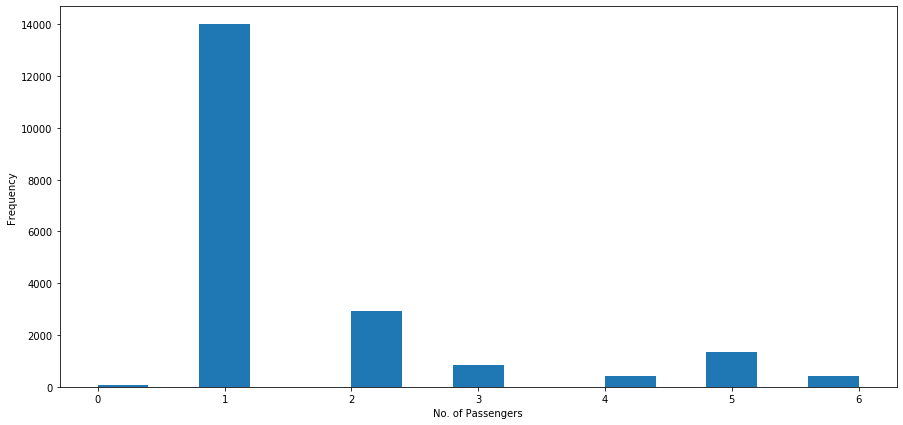

In [229]:
#1. Does the number of passengers affect the fare?
plt.figure(figsize=(15,7))
plt.hist(train['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

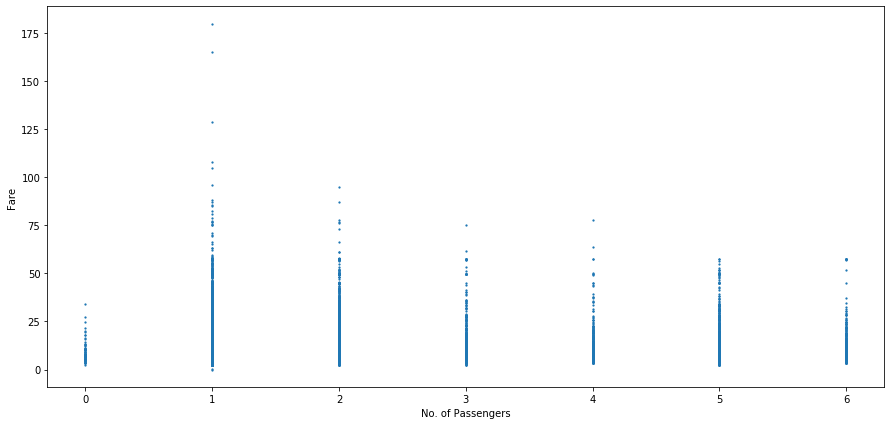

In [230]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

In [231]:
#From the above 2 graphs we can see that single passengers are the most frequent travellers, and the highest fare also seems to come from cabs which carry just 1 passenger

In [232]:
train.sort_values(['H_Distance','fare_amount'], ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
9147,2014-07-14 21:37:29.0000002,8.50,2014-07-14 21:37:29 UTC,0.000000,0.000000,-74.002037,40.752035,1,8667.542104
8647,2014-03-27 18:01:00.00000071,21.50,2014-03-27 18:01:00 UTC,-74.001808,40.750782,0.000000,0.000000,1,8667.497512
2397,2012-06-24 17:11:10.0000001,45.00,2012-06-24 17:11:10 UTC,0.000000,0.000000,-74.010230,40.714553,2,8667.454421
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00 UTC,0.000000,0.000000,-74.005433,40.726685,2,8667.304968
16690,2013-03-16 03:22:56.0000001,12.00,2013-03-16 03:22:56 UTC,0.000000,0.000000,-73.997673,40.746340,1,8667.064257
15919,2011-10-17 08:58:54.0000005,16.50,2011-10-17 08:58:54 UTC,0.000000,0.000000,-73.999700,40.734500,0,8666.989922
19775,2015-01-18 19:00:01.0000007,18.00,2015-01-18 19:00:01 UTC,0.000000,0.000000,-73.988968,40.775120,1,8666.932754
11653,2015-03-04 16:06:28.0000001,16.00,2015-03-04 16:06:28 UTC,0.000000,0.000000,-73.985329,40.778534,1,8666.701504
18842,2015-02-24 12:18:32.0000005,2.50,2015-02-24 12:18:32 UTC,0.000000,0.000000,-73.993217,40.743061,2,8666.628222
14308,2011-11-11 12:03:38.0000002,8.10,2011-11-11 12:03:38 UTC,0.000000,0.000000,-73.990000,40.755400,0,8666.614377


In [233]:
len(train)

19996

In [234]:
bins_0 = train.loc[(train['H_Distance'] == 0), ['H_Distance']]
bins_1 = train.loc[(train['H_Distance'] > 0) & (train['H_Distance'] <= 10),['H_Distance']]
bins_2 = train.loc[(train['H_Distance'] > 10) & (train['H_Distance'] <= 50),['H_Distance']]
bins_3 = train.loc[(train['H_Distance'] > 50) & (train['H_Distance'] <= 100),['H_Distance']]
bins_4 = train.loc[(train['H_Distance'] > 100) & (train['H_Distance'] <= 200),['H_Distance']]
bins_5 = train.loc[(train['H_Distance'] > 200) & (train['H_Distance'] <= 300),['H_Distance']]
bins_6 = train.loc[(train['H_Distance'] > 300),['H_Distance']]
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'
dist_bins =pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])
#len(dist_bins)
dist_bins.columns

Index(['H_Distance', 'bins'], dtype='object')

In [235]:
Counter(dist_bins['bins'])

Counter({'0': 571,
         '0-10': 18394,
         '11-50': 986,
         '51-100': 7,
         '100-200': 5,
         '>300': 33})

In [236]:
#pickup latitude and longitude = 0
train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance


In [237]:
train = train.drop(train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)].index, axis=0)

In [238]:
#1 row dropped
train.shape

(19996, 9)

In [239]:
#dropoff latitude and longitude = 0
train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance


In [240]:
train = train.drop(train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)].index, axis=0)

In [241]:
#3 rows dropped
train.shape

(19996, 9)

In [242]:
high_distance = train.loc[(train['H_Distance']>200)&(train['fare_amount']!=0)]

In [243]:
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00 UTC,0.000000,0.000000,-74.005433,40.726685,2,8667.304968
1260,2011-03-10 20:25:00.00000049,5.70,2011-03-10 20:25:00 UTC,-73.973907,40.754743,0.000000,0.000000,2,8665.268588
2280,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00 UTC,-73.936667,40.757815,0.000000,40.757815,1,6026.494216
2397,2012-06-24 17:11:10.0000001,45.00,2012-06-24 17:11:10 UTC,0.000000,0.000000,-74.010230,40.714553,2,8667.454421
4278,2015-04-07 23:33:02.0000005,7.00,2015-04-07 23:33:02 UTC,-73.972702,40.757423,0.000000,0.000000,1,8665.223767
4597,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00 UTC,0.000000,0.000000,-73.989693,40.754280,1,8666.566030
5864,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00 UTC,-73.995030,40.744945,-7.986640,40.729937,1,5420.988959
6188,2014-07-28 15:04:00.00000028,15.50,2014-07-28 15:04:00 UTC,0.000000,0.000000,-73.952980,40.786670,5,8664.191488
6302,2015-02-27 16:18:58.0000004,16.50,2015-02-27 16:18:58 UTC,0.000000,0.000000,-73.936600,40.796543,1,8663.039123
7014,2011-06-18 04:03:00.00000083,4.50,2011-06-18 04:03:00 UTC,-73.988980,40.721697,-74.001073,0.728087,3,4447.086698


In [244]:
distance = (train.fare_amount - 2.5)/1.56

In [245]:
high_distance.shape

(33, 9)

In [246]:
high_distance['H_Distance'] = high_distance.apply(
    lambda row: (row['fare_amount'] - 2.50)/1.56,
    axis=1
)

c:\users\tax consultant\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [247]:
#The distance values have been replaced by the newly calculated ones according to the fare
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00 UTC,0.000000,0.000000,-74.005433,40.726685,2,0.000000
1260,2011-03-10 20:25:00.00000049,5.70,2011-03-10 20:25:00 UTC,-73.973907,40.754743,0.000000,0.000000,2,2.051282
2280,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00 UTC,-73.936667,40.757815,0.000000,40.757815,1,4.102564
2397,2012-06-24 17:11:10.0000001,45.00,2012-06-24 17:11:10 UTC,0.000000,0.000000,-74.010230,40.714553,2,27.243590
4278,2015-04-07 23:33:02.0000005,7.00,2015-04-07 23:33:02 UTC,-73.972702,40.757423,0.000000,0.000000,1,2.884615
4597,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00 UTC,0.000000,0.000000,-73.989693,40.754280,1,2.820513
5864,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00 UTC,-73.995030,40.744945,-7.986640,40.729937,1,3.846154
6188,2014-07-28 15:04:00.00000028,15.50,2014-07-28 15:04:00 UTC,0.000000,0.000000,-73.952980,40.786670,5,8.333333
6302,2015-02-27 16:18:58.0000004,16.50,2015-02-27 16:18:58 UTC,0.000000,0.000000,-73.936600,40.796543,1,8.974359
7014,2011-06-18 04:03:00.00000083,4.50,2011-06-18 04:03:00 UTC,-73.988980,40.721697,-74.001073,0.728087,3,1.282051


In [248]:
#sync the train data with the newly computed distance values from high_distance dataframe
train.update(high_distance)

In [249]:
train.shape

(19996, 9)

In [250]:
#Now we shall check for rows where the distance values are 0
train[train['H_Distance']==0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
11,2012-12-24 11:24:00.00000098,5.50,2012-12-24 11:24:00 UTC,0.000000,0.000000,0.000000,0.000000,3.0,0.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00 UTC,0.000000,0.000000,0.000000,0.000000,1.0,0.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00 UTC,0.000000,0.000000,0.000000,0.000000,1.0,0.0
105,2009-03-25 00:08:52.0000001,52.00,2009-03-25 00:08:52 UTC,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0
124,2013-01-17 17:22:00.00000043,8.00,2013-01-17 17:22:00 UTC,0.000000,0.000000,0.000000,0.000000,2.0,0.0
191,2014-01-08 21:55:58.0000006,6.50,2014-01-08 21:55:58 UTC,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0
192,2010-09-05 17:08:00.00000092,3.70,2010-09-05 17:08:00 UTC,0.000000,0.000000,0.000000,0.000000,5.0,0.0
233,2011-07-24 01:14:35.0000002,8.50,2011-07-24 01:14:35 UTC,0.000000,0.000000,0.000000,0.000000,2.0,0.0
270,2012-08-25 01:53:42.0000005,7.50,2012-08-25 01:53:42 UTC,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0
273,2009-10-30 18:13:00.00000021,8.10,2009-10-30 18:13:00 UTC,0.000000,0.000000,0.000000,0.000000,4.0,0.0


In [251]:
#SCENARIO 1

#Fare and Distance are both 0. According to the table above, we shall delete them as they do not provide us any info with regards to the data.

train[(train['H_Distance']==0)&(train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance


In [252]:

train = train.drop(train[(train['H_Distance']==0)&(train['fare_amount']==0)].index, axis = 0)

In [253]:
#4 rows dropped
train[(train['H_Distance']==0)].shape

(575, 9)

In [254]:
train.shape

(19996, 9)

In [255]:
#SCENARIO 2

#fare = 2.5 + 1.56(train.H_Distance)

In [256]:
train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
10002,2010-02-15 14:26:01.0000003,0.0,2010-02-15 14:26:01 UTC,-73.987115,40.738808,-74.005911,40.71396,1.0,3.184763


In [257]:
scenario_2 = train.loc[(train['H_Distance']!=0) & (train['fare_amount']==0)]

In [258]:
len(scenario_2)

1

In [259]:
scenario_2.sort_values('H_Distance', ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
10002,2010-02-15 14:26:01.0000003,0.0,2010-02-15 14:26:01 UTC,-73.987115,40.738808,-74.005911,40.71396,1.0,3.184763


In [260]:
scenario_2['fare_amount']

10002    0.0
Name: fare_amount, dtype: float64

In [261]:
train.update(scenario_2)

In [262]:
train.shape

(19996, 9)

In [263]:
#SCENARIO 3

#Fare is not 0, but Distance is 0. These values need to be imputed.

train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
11,2012-12-24 11:24:00.00000098,5.50,2012-12-24 11:24:00 UTC,0.000000,0.000000,0.000000,0.000000,3.0,0.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00 UTC,0.000000,0.000000,0.000000,0.000000,1.0,0.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00 UTC,0.000000,0.000000,0.000000,0.000000,1.0,0.0
105,2009-03-25 00:08:52.0000001,52.00,2009-03-25 00:08:52 UTC,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0
124,2013-01-17 17:22:00.00000043,8.00,2013-01-17 17:22:00 UTC,0.000000,0.000000,0.000000,0.000000,2.0,0.0
191,2014-01-08 21:55:58.0000006,6.50,2014-01-08 21:55:58 UTC,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0
192,2010-09-05 17:08:00.00000092,3.70,2010-09-05 17:08:00 UTC,0.000000,0.000000,0.000000,0.000000,5.0,0.0
233,2011-07-24 01:14:35.0000002,8.50,2011-07-24 01:14:35 UTC,0.000000,0.000000,0.000000,0.000000,2.0,0.0
270,2012-08-25 01:53:42.0000005,7.50,2012-08-25 01:53:42 UTC,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0
273,2009-10-30 18:13:00.00000021,8.10,2009-10-30 18:13:00 UTC,0.000000,0.000000,0.000000,0.000000,4.0,0.0


In [264]:
scenario_3 = train.loc[(train['H_Distance']==0) & (train['fare_amount']!=0)]

In [265]:
len(scenario_3)

575

In [266]:
scenario_3.loc[(scenario_3['fare_amount']<=3.0)&(scenario_3['H_Distance']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
376,2014-05-29 05:57:22.0000001,2.5,2014-05-29 05:57:22 UTC,0.000000,0.000000,0.000000,0.000000,1.0,0.0
472,2009-02-22 22:48:00.000000130,2.5,2009-02-22 22:48:00 UTC,0.000000,0.000000,-74.005433,40.726685,2.0,0.0
503,2010-01-19 01:10:00.00000012,2.5,2010-01-19 01:10:00 UTC,-73.998720,40.624708,-73.998720,40.624708,1.0,0.0
657,2009-08-25 01:50:21.0000001,2.5,2009-08-25 01:50:21 UTC,-73.986410,40.763350,-73.986410,40.763350,1.0,0.0
799,2013-12-08 23:39:00.00000080,3.0,2013-12-08 23:39:00 UTC,0.000000,0.000000,0.000000,0.000000,5.0,0.0
958,2011-02-22 14:09:00.00000066,2.5,2011-02-22 14:09:00 UTC,0.000000,0.000000,0.000000,0.000000,5.0,0.0
1419,2013-07-21 00:10:23.0000001,2.5,2013-07-21 00:10:23 UTC,-73.956556,40.779828,-73.956556,40.779828,1.0,0.0
1774,2012-08-27 15:24:00.0000007,2.5,2012-08-27 15:24:00 UTC,-73.950282,40.701282,-73.950282,40.701282,1.0,0.0
3168,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00 UTC,0.000000,0.000000,0.000000,0.000000,1.0,0.0
4367,2014-01-13 16:14:48.0000001,2.5,2014-01-13 16:14:48 UTC,-73.948410,40.744969,-73.948410,40.744969,1.0,0.0


In [267]:
scenario_3.loc[(scenario_3['fare_amount']>3.0)&(scenario_3['H_Distance']==0)]

#These 27159 rows need to be imputed using the following formula -

distance = (train.fare_amount - 2.5)/1.56

In [268]:
scenario_3_sub = scenario_3.loc[(scenario_3['fare_amount']>3.0)&(scenario_3['H_Distance']==0)]

In [269]:
len(scenario_3_sub)

536

In [270]:
scenario_3_sub['H_Distance'] = scenario_3_sub.apply(
lambda row: ((row['fare_amount']-2.50)/1.56), axis=1
)

c:\users\tax consultant\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [271]:
train.update(scenario_3_sub)

# PART 2 --> MODELLING AND PREDICTION

In [272]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'H_Distance'],
      dtype='object')

In [273]:
train = train.drop(['key','pickup_datetime'], axis = 1)
#test = test.drop(['key','pickup_datetime'], axis = 1)

In [274]:
train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'H_Distance'],
      dtype='object')

In [275]:
train=train[train['dropoff_latitude']<=8]

In [276]:
X = train.iloc[:,train.columns!='fare_amount']

In [277]:
y = train['fare_amount'].values

In [278]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)
print(X_train.shape)
print(y_test.shape)

(314, 6)
(79,)


In [279]:
from sklearn.ensemble import RandomForestRegressor
Model = RandomForestRegressor(n_estimators=20)
Model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [280]:
result=Model.predict(X_test)

In [281]:
print(Model.score(X_test,y_test))

0.9803453301754904


# Predicted_Fare for the randomly taken Data_set :

In [282]:
Predicted_Result=print('Predicted_Fare for given distance is :', Model.predict(np.array(X_test.iloc[25]).reshape(1,-1))[0])

Predicted_Fare for given distance is : 8.0


# Actual_Fare from the same Data_set :

In [283]:
Actual_Fare=print('Actual_Fare for same distance is :', y_test[25])

Actual_Fare for same distance is : 8.0
